In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("Data/titanic.txt", sep = ";")

In [3]:
#del titanic["Name"] pour supprimer une colonne

print(titanic)
print(titanic.info())

     Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex   Age  Siblings  Parents     Fare  
0      male  22.0         1        0   

In [31]:
print(titanic["Survived"].value_counts())
print(titanic["Pclass"].value_counts())
print(titanic["Sex"].value_counts())
print(titanic["Age"].value_counts())
print(titanic["Siblings"].value_counts())
print(titanic["Parents"].value_counts())
print(titanic["Fare"].value_counts())

0    545
1    342
Name: Survived, dtype: int64
3    487
1    216
2    184
Name: Pclass, dtype: int64
1    573
0    314
Name: Sex, dtype: int64
22.00    39
28.00    37
18.00    36
21.00    34
24.00    34
         ..
0.92      1
23.50     1
36.50     1
55.50     1
74.00     1
Name: Age, Length: 89, dtype: int64
0    604
1    209
2     28
4     18
3     16
8      7
5      5
Name: Siblings, dtype: int64
0    674
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parents, dtype: int64
8.0500     43
13.0000    42
7.8958     36
7.7500     33
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


In [9]:
matcorr = titanic.corr()
print(matcorr)

          Survived    Pclass       Age  Siblings   Parents      Fare
Survived  1.000000 -0.336528 -0.059665 -0.037082  0.080097  0.256179
Pclass   -0.336528  1.000000 -0.391492  0.085026  0.020252 -0.548919
Age      -0.059665 -0.391492  1.000000 -0.297669 -0.193741  0.112329
Siblings -0.037082  0.085026 -0.297669  1.000000  0.414244  0.158839
Parents   0.080097  0.020252 -0.193741  0.414244  1.000000  0.215470
Fare      0.256179 -0.548919  0.112329  0.158839  0.215470  1.000000


In [12]:
titanic["Sex"] = titanic["Sex"].astype("category")
cat_columns = titanic.select_dtypes(["category"]).columns
titanic[cat_columns] = titanic[cat_columns].apply(lambda x: x.cat.codes)

In [14]:
matcorr = titanic.corr()
print(matcorr)

          Survived    Pclass       Sex       Age  Siblings   Parents      Fare
Survived  1.000000 -0.336528 -0.542152 -0.059665 -0.037082  0.080097  0.256179
Pclass   -0.336528  1.000000  0.129507 -0.391492  0.085026  0.020252 -0.548919
Sex      -0.542152  0.129507  1.000000  0.091875 -0.113249 -0.244337 -0.181137
Age      -0.059665 -0.391492  0.091875  1.000000 -0.297669 -0.193741  0.112329
Siblings -0.037082  0.085026 -0.113249 -0.297669  1.000000  0.414244  0.158839
Parents   0.080097  0.020252 -0.244337 -0.193741  0.414244  1.000000  0.215470
Fare      0.256179 -0.548919 -0.181137  0.112329  0.158839  0.215470  1.000000


In [16]:
titanic["Sex"] 
# "1" -> "male"
# "0" -> "female"

0      1
1      0
2      0
3      0
4      1
      ..
882    1
883    0
884    0
885    1
886    1
Name: Sex, Length: 887, dtype: int8

In [21]:
survived = titanic[titanic["Survived"] == 1]["Sex"].value_counts()
dead = titanic[titanic["Survived"] == 0]["Sex"].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ["Survived", "Dead"]
df.columns = ["Female", "Male"]
df

,Female,Male
Survived,233,109
Dead,81,464


<AxesSubplot:>

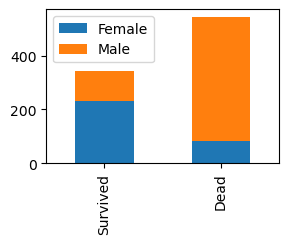

In [24]:
df.plot(kind = "bar", stacked = True, figsize = (3, 2))

In [26]:
survived = titanic[titanic["Survived"] == 1]["Pclass"].value_counts()
dead = titanic[titanic["Survived"] == 0]["Pclass"].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ["Survived", "Dead"]
df

,1,3,2
Survived,136,119,87
Dead,80,368,97


<AxesSubplot:>

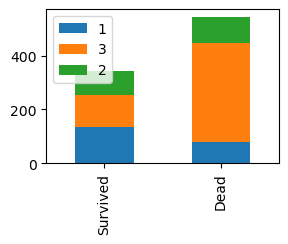

In [27]:
df.plot(kind = "bar", stacked = True, figsize = (3, 2))

In [28]:
F1 = titanic.query("Sex == 0 & Pclass == 1")["Survived"].value_counts()
F2 = titanic.query("Sex == 0 & Pclass == 2")["Survived"].value_counts()
F3 = titanic.query("Sex == 0 & Pclass == 3")["Survived"].value_counts()
H1 = titanic.query("Sex == 1 & Pclass == 1")["Survived"].value_counts()
H2 = titanic.query("Sex == 1 & Pclass == 2")["Survived"].value_counts()
H3 = titanic.query("Sex == 1 & Pclass == 3")["Survived"].value_counts()
df = pd.DataFrame([F1, F2, F3, H1, H2, H3])
df.columns = ["Survived", "Dead"]
df.index = ["F1", "F2", "F3", "H1", "H2", "H3"]
df

,Survived,Dead
F1,91,3
F2,70,6
F3,72,72
H1,45,77
H2,17,91
H3,47,296


<AxesSubplot:>

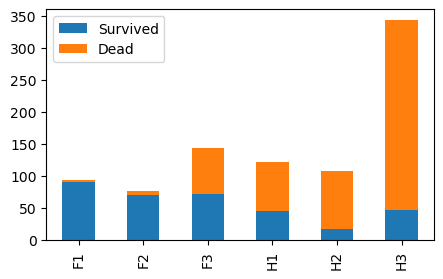

In [30]:
df.plot(kind = "bar", stacked = True, figsize = (5, 3))